In [1]:
import sopa

/Users/quentinblampey/mambaforge/envs/sopa/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
sdata = sopa.io.toy_dataset(as_output=True)

[INFO] (sopa.utils.data) Image of size ((4, 2048, 2048)) with 400 cells and 100 transcripts per cell
[INFO] (sopa.aggregation.transcripts) Aggregating transcripts over 400 cells


[########################################] | 100% Completed | 243.12 ms


[INFO] (sopa.aggregation.channels) Averaging channels intensity over 400 cells with expansion expand_radius_ratio=0


[########################################] | 100% Completed | 105.32 ms


/Users/quentinblampey/dev/_external/spatialdata/src/spatialdata/_core/_elements.py:96: UserWarning: Key `cellpose_boundaries` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [3]:
sopa.io.explorer.write("data.explorer", sdata)

[INFO] (sopa.io.explorer.table) Writing table with 6 columns
[INFO] (sopa.io.explorer.table) Writing 2 cell categories: region, slide
[INFO] (sopa.io.explorer.shapes) Writing 400 cell polygons
[INFO] (sopa.io.explorer.points) Writing 40000 transcripts
[INFO] (sopa.io.explorer.points)    > Level 0: 40000 transcripts
[INFO] (sopa.io.explorer.points)    > Level 1: 10000 transcripts
[INFO] (sopa.io.explorer.images) Writing multiscale image with procedure=semi-lazy (load in memory when possible)
[INFO] (sopa.io.explorer.images)    (Loading image of shape (4, 2048, 2048)) in memory
[INFO] (sopa.io.explorer.images)    > Image of shape (4, 2048, 2048)
[INFO] (sopa.io.explorer.images)    > Image of shape (4, 1024, 1024)
[INFO] (sopa.io.explorer.images)    > Image of shape (4, 512, 512)
[INFO] (sopa.io.explorer.images)    > Image of shape (4, 256, 256)
[INFO] (sopa.io.explorer.images)    > Image of shape (4, 128, 128)
[INFO] (sopa.io.explorer.images)    > Image of shape (4, 64, 64)
[INFO] (sopa.

In [4]:
image = sopa.io.ome_tif("example_image.tif", as_image=True)
sopa.io.explorer.write_image("data.explorer/image.ome.tif", image, is_dir=False)

[WARNING] (sopa.io.reader.utils) Channel names couldn't be read. Using ['0'] instead.
[INFO] (sopa.io.explorer.images) Writing multiscale image with procedure=semi-lazy (load in memory when possible)
[INFO] (sopa.io.explorer.images)    (Loading image of shape (1, 480, 640)) in memory
[INFO] (sopa.io.explorer.images)    > Image of shape (1, 480, 640)
[INFO] (sopa.io.explorer.images)    > Image of shape (1, 240, 320)
[INFO] (sopa.io.explorer.images)    > Image of shape (1, 120, 160)
[INFO] (sopa.io.explorer.images)    > Image of shape (1, 60, 80)
[INFO] (sopa.io.explorer.images)    > Image of shape (1, 30, 40)
[INFO] (sopa.io.explorer.images)    > Image of shape (1, 15, 20)


In [5]:
sopa.io.explorer.align(sdata, image, "image_test_matrix.csv")

[INFO] (sopa.io.explorer.images) Added image example_image - aligned with the Xenium Explorer


In [6]:
import spatialdata_plot

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.9530949634755863].


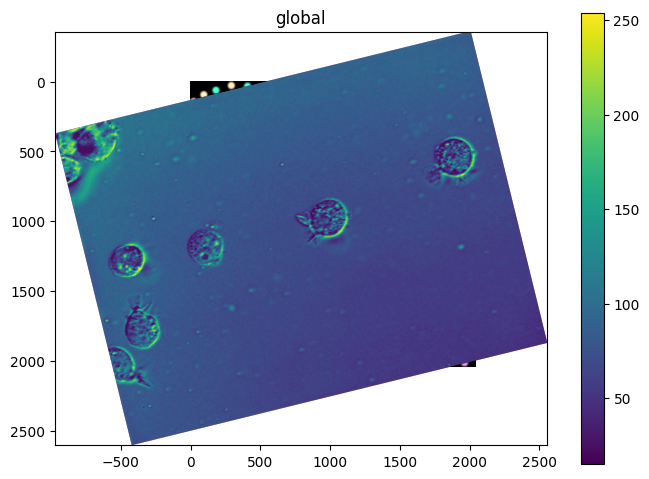

In [8]:
sdata.pl.render_images("image").pl.render_images("example_image").pl.show("global")

In [10]:
del sdata.images['example_image']

In [11]:
sdata.write("data.zarr")

INFO     The Zarr backing store has been changed from None the new file path: data.zarr                            


In [ ]:
# command to test it
"""
sopa explorer add-aligned data.zarr example_image.tif image_test_matrix.csv
"""